<a href="https://colab.research.google.com/github/PreethamThinagaraj/CE888/blob/main/Dissertation_code_for_submission_updated_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive**

In [ ]:
#Mounting to the google drive where the data is uploaded
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Installing Augmentor**

In [ ]:
pip install augmentor

**Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import random
import shutil
import os
import Augmentor
import seaborn as sns
import PIL
from zipfile import ZipFile
from keras.applications.vgg16 import VGG16

**Initializing variables to store the path of CT Scan and Xray zip files**

In [ ]:
ct_scan = "/content/drive/MyDrive/Colab Notebooks/Dissertation/ct_scan.zip"
xray="/content/drive/MyDrive/Colab Notebooks/Dissertation/COVID-19_Radiography_Database.zip"

**Creating a funtion to extract the zip files**

In [ ]:
#function to extract files
def file_extractor(file_name):
  with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('done')

**Calling the function to extract the files**

In [ ]:
file_extractor(ct_scan)

done


In [ ]:
file_extractor(xray)

done


**Creating Directories to perform data manuplation to get the dataset in the desired format for our analysis**

In [ ]:
base_dir='/content'
#creating augmented data directory
aug_dir = os.path.join(base_dir, 'Augmented data')
os.mkdir(aug_dir)

#creating the augmented xray image directory along with covid and non-covid sub-directories
xray_dir=os.path.join(aug_dir, 'XRay_Augmented_data')
os.mkdir(xray_dir)

covid_xray_dir=os.path.join(xray_dir, 'COVID-19')
os.mkdir(covid_xray_dir)

non_covid_xray_dir=os.path.join(xray_dir, 'NON-COVID')
os.mkdir(non_covid_xray_dir)

#creating the augmented CT Scan image directory along with covid and non-covid sub-directories
scan_dir=os.path.join(aug_dir, 'CT_Scan_Augmented_data')
os.mkdir(scan_dir)

covid_scan_dir=os.path.join(scan_dir, 'COVID-19')
os.mkdir(covid_scan_dir)

non_covid_scan_dir=os.path.join(scan_dir, 'NON-COVID')
os.mkdir(non_covid_scan_dir)

#creating directory to store the final data from xray and ctscan images
master_dir=os.path.join(base_dir, 'Final Data')
os.mkdir(master_dir)

covid_dir=os.path.join(master_dir, 'COVID-19')
os.mkdir(covid_dir)

non_covid_dir=os.path.join(master_dir, 'NON-COVID')
os.mkdir(non_covid_dir)

**Initializing variables to store the path of the CT Scan and Xray files**

In [ ]:
covidpath_ct_scan="/content/ct_scan/curated_data/curated_data/2COVID"

noncovidpath_ct_scan="/content/ct_scan/curated_data/curated_data/1NonCOVID"

covidpath_xray="/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID"

noncovidpath_xray="/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal"

In [ ]:
#variables to store the augmented paths
aug_covidpath_ct_scan="/content/Augmented data/CT_Scan_Augmented_data/COVID-19"

aug_noncovidpath_ct_scan="/content/Augmented data/CT_Scan_Augmented_data/NON-COVID"

aug_covidpath_xray="/content/Augmented data/XRay_Augmented_data/COVID-19"

aug_noncovidpath_xray="/content/Augmented data/XRay_Augmented_data/NON-COVID"

**Creating Training, Test and validation directories with sub-directories**

In [ ]:
#creating training directories
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

covid_train_dir=os.path.join(train_dir, 'COVID-19')
os.mkdir(covid_train_dir)

non_covid_train_dir=os.path.join(train_dir, 'NON-COVID')
os.mkdir(non_covid_train_dir)

In [ ]:
#creating test directories
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

covid_test_dir=os.path.join(test_dir, 'COVID-19')
os.mkdir(covid_test_dir)

non_covid_test_dir=os.path.join(test_dir, 'NON-COVID')
os.mkdir(non_covid_test_dir)

In [ ]:
#creating validation directories
val_dir = os.path.join(base_dir, 'val')
os.mkdir(val_dir)

covid_val_dir=os.path.join(val_dir, 'COVID-19')
os.mkdir(covid_val_dir)

non_covid_val_dir=os.path.join(val_dir, 'NON-COVID')
os.mkdir(non_covid_val_dir)

**Creating a function to get the file path**

In [ ]:
#function to get path of files
def path_list(path):
  files = os.listdir(path)
  lst_img = [ path + "/" + item for i,item in enumerate(files)]
  return lst_img

**Checking the number of images in Xray and CT scan folders**

In [ ]:
print('Number of images with covid : {}'.format(len(path_list(covidpath_ct_scan))))
print('Number of images with non_covid : {}'.format(len(path_list(noncovidpath_ct_scan))))

Number of images with covid : 7593
Number of images with non_covid : 6893


In [ ]:
print('Number of images with covid : {}'.format(len(path_list(covidpath_xray))))
print('Number of images with non_covid : {}'.format(len(path_list(noncovidpath_xray))))

Number of images with covid : 3616
Number of images with non_covid : 10192


**function to get the path list of both classes to create a dataframe for visualization purpose**

In [ ]:
def complete_path_list(covidpath,noncovidpath):
  lst_covid = []
  for x in path_list(covidpath):
    lst_covid.append([x,"Covid-19"])
  lst_non_covid = []
  for x in path_list(noncovidpath):
    lst_non_covid.append([x,"Non-Covid"])
  lst_complete = lst_covid + lst_non_covid
  random.shuffle(lst_complete)
  return lst_complete

In [ ]:
#setting the display column width to 1000
pd.set_option('display.max_colwidth',1000)

In [ ]:
#creating dataframe consisting of Xray images to visualize the class imbalance
df_xray = pd.DataFrame(complete_path_list(covidpath_xray,noncovidpath_xray),columns = ['files','Classes'])
df_xray.head(10)

,files,Classes
0,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3737.png,Non-Covid
1,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-1194.png,Non-Covid
2,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-5066.png,Non-Covid
3,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3226.png,Non-Covid
4,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-9647.png,Non-Covid
5,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3110.png,Non-Covid
6,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/COVID-2084.png,Covid-19
7,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3419.png,Non-Covid
8,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-8961.png,Non-Covid
9,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/COVID-942.png,Covid-19


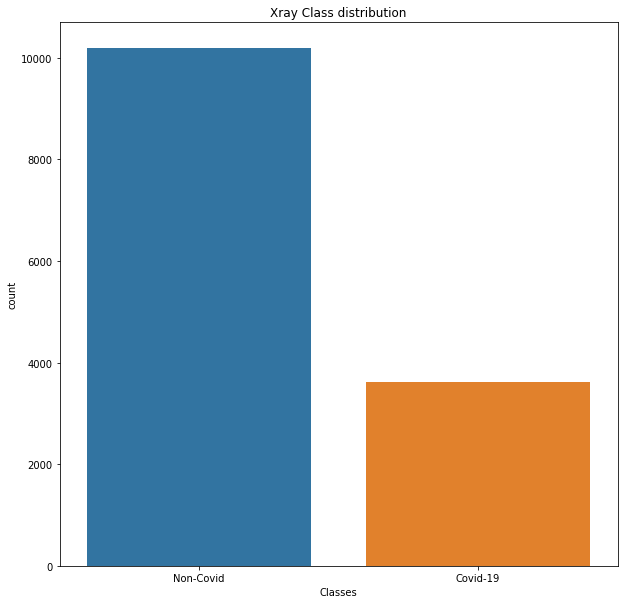

In [ ]:
#plotting a bar chart to visualize the class imbalance
plt.figure(figsize = (10,10))
plt.title("Xray Class distribution")
sns.countplot(x = "Classes",data = df_xray)
plt.show()

In [ ]:
#creating dataframe consisting of CT Scan images to visualize the class imbalance
df_scan = pd.DataFrame(complete_path_list(covidpath_ct_scan,noncovidpath_ct_scan),columns = ['files','Classes'])
df_scan.head(10)

,files,Classes
0,/content/ct_scan/curated_data/curated_data/2COVID/P040_128.png,Covid-19
1,/content/ct_scan/curated_data/curated_data/2COVID/P019_113.png,Covid-19
2,/content/ct_scan/curated_data/curated_data/1NonCOVID/normal001_121.png,Non-Covid
3,/content/ct_scan/curated_data/curated_data/1NonCOVID/16_Morozov_study_0201_19.png,Non-Covid
4,/content/ct_scan/curated_data/curated_data/2COVID/P030_128.png,Covid-19
5,/content/ct_scan/curated_data/curated_data/1NonCOVID/6_Rahimzadeh_normal5_patient250_SR_4_IM00015.png,Non-Covid
6,/content/ct_scan/curated_data/curated_data/2COVID/14_Jun_coronacases_case4_116.png,Covid-19
7,/content/ct_scan/curated_data/curated_data/2COVID/P039_144.png,Covid-19
8,/content/ct_scan/curated_data/curated_data/2COVID/P010_116.png,Covid-19
9,/content/ct_scan/curated_data/curated_data/2COVID/17_Zhao_Ni2020_Article_CombinationOfWesternMedicineAn-p4-13%1.png,Covid-19


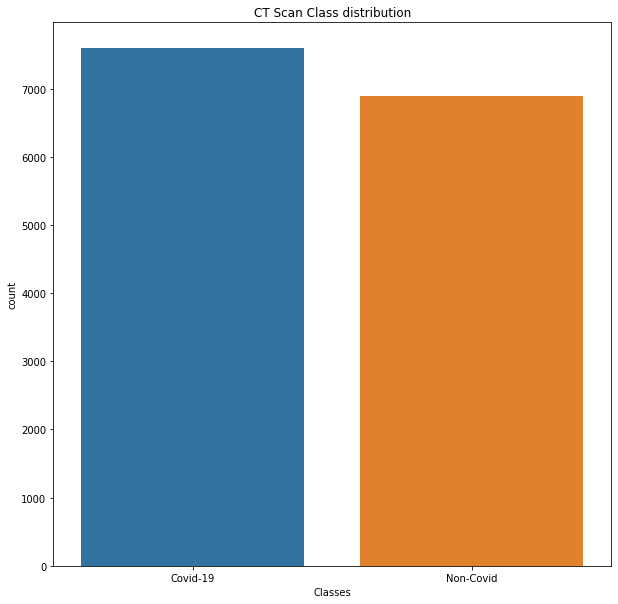

In [ ]:
#plotting a bar chart to visualize the class imbalance
plt.figure(figsize = (10,10))
plt.title("CT Scan Class distribution")
sns.countplot(x = "Classes",data = df_scan)
plt.show()

**Creating a augmentation function using augmentor**

In [ ]:
#creating an augmentation function using the augmentor to perform various augmentation operations
def augmentation(input_path,output_path,samplecount):
  aug = Augmentor.Pipeline(input_path,output_directory=output_path)
  aug.rotate90(probability=0.5)
  aug.rotate270(probability=0.5)
  aug.flip_left_right(probability=0.8)
  aug.flip_top_bottom(probability=0.3)
  aug.shear(1, max_shear_left = 3, max_shear_right = 3)
  aug.zoom_random(probability=0.2, percentage_area=0.8)
  aug.sample(samplecount)


**Performing data augmentation to balance class imbalance**

In [ ]:
#performing data augmentation on the covid xray images
augmentation(covidpath_xray,aug_covidpath_xray,len(path_list(noncovidpath_xray))-len(path_list(covidpath_xray)))

Initialised with 3616 image(s) found.
Output directory set to /content/Augmented data/XRay_Augmented_data/COVID-19.

Processing <PIL.Image.Image image mode=L size=299x299 at 0x7F815FBC5750>: 100%|██████████| 6576/6576 [00:24<00:00, 267.59 Samples/s]


In [ ]:
#checking the number of augmented covid xray images
len(os.listdir(aug_covidpath_xray))

6576

In [ ]:
#performing data augmentation on the covid CT Scan images
augmentation(covidpath_ct_scan,aug_covidpath_ct_scan,10000-len(path_list(covidpath_ct_scan)))

Initialised with 7593 image(s) found.
Output directory set to /content/Augmented data/CT_Scan_Augmented_data/COVID-19.

Processing <PIL.Image.Image image mode=L size=512x512 at 0x7F80F9BB2F90>: 100%|██████████| 2407/2407 [00:15<00:00, 156.17 Samples/s]


In [ ]:
#checking the number of augmented covid CT Scan images
len(os.listdir(aug_covidpath_ct_scan))

2407

In [ ]:
#performing data augmentation on the non-covid CT Scan images
augmentation(noncovidpath_ct_scan,aug_noncovidpath_ct_scan,10000-len(path_list(noncovidpath_ct_scan)))

Initialised with 6893 image(s) found.
Output directory set to /content/Augmented data/CT_Scan_Augmented_data/NON-COVID.

Processing <PIL.Image.Image image mode=L size=512x512 at 0x7F815FB6A390>: 100%|██████████| 3107/3107 [00:16<00:00, 184.31 Samples/s]


In [ ]:
#checking the number of augmented non-covid CT Scan images
len(os.listdir(aug_noncovidpath_ct_scan))

3107

In [ ]:
#creating variables to store the path of the list of augmented images
aug_covid_files_xray = os.listdir(aug_covidpath_xray)
aug_covid_files_ct_scan = os.listdir(aug_covidpath_ct_scan)
aug_noncovid_files_ct_scan = os.listdir(aug_noncovidpath_ct_scan)

**Creating s function to copy files from one directory to another**

In [ ]:
#function to copy files from one directory to another
def copyfiles(sourcepath,destinationpath,filename):
  for f in filename:
    source = os.path.join(sourcepath, f)
    dest = os.path.join(destinationpath, f)
    shutil.copyfile(source, dest)

In [ ]:
#copying the augmented covid Xray images to to original covid Xray directory
copyfiles(aug_covidpath_xray,covidpath_xray,aug_covid_files_xray)

In [ ]:
#checking the number of covid xray images in original directory
len(os.listdir(covidpath_xray))

10192

In [ ]:
#copying the augmented covid CT scan images to to original Covid CT scan directory
copyfiles(aug_covidpath_ct_scan,covidpath_ct_scan,aug_covid_files_ct_scan)

In [ ]:
#checking the number of covid CT Scan images in original directory
len(os.listdir(covidpath_ct_scan))

10000

In [ ]:
#copying the augmented non-covid CT-Scan images to to original non-Covid CT scan directory
copyfiles(aug_noncovidpath_ct_scan,noncovidpath_ct_scan,aug_noncovid_files_ct_scan)

In [ ]:
#checking the number of non-covid CT Scan images in original directory
len(os.listdir(noncovidpath_ct_scan))

10000

In [ ]:
#creating dataframe consisting of Xray images to visualize the class imbalance
df_xray = pd.DataFrame(complete_path_list(covidpath_xray,noncovidpath_xray),columns = ['files','Classes'])
df_xray.head(10)

,files,Classes
0,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3792.png,Non-Covid
1,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/COVID_original_COVID-1888.png_4bbbb148-f305-4230-82da-3dc59ed57bfb.png,Covid-19
2,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-8615.png,Non-Covid
3,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/COVID-448.png,Covid-19
4,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3824.png,Non-Covid
5,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-7049.png,Non-Covid
6,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-7111.png,Non-Covid
7,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-7616.png,Non-Covid
8,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-9235.png,Non-Covid
9,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-565.png,Non-Covid


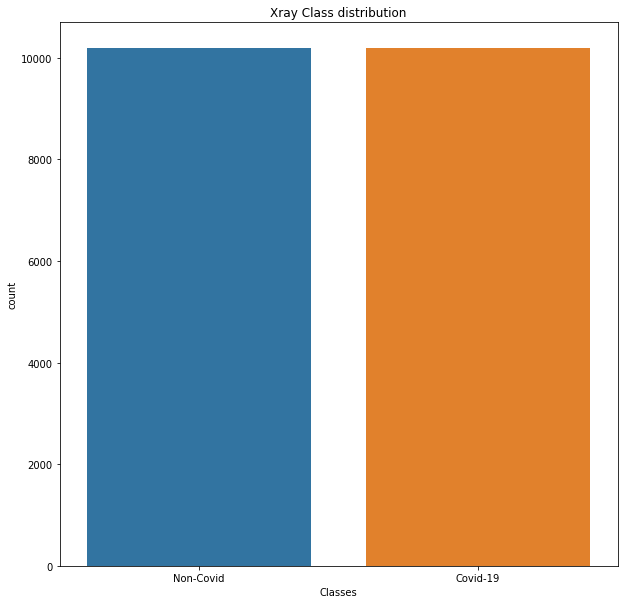

In [ ]:
#plotting a bar chart to visualize the class balance
plt.figure(figsize = (10,10))
plt.title("Xray Class distribution")
sns.countplot(x = "Classes",data = df_xray)
plt.show()

In [ ]:
#creating dataframe consisting of CT Scan images to visualize the class balance
df_scan = pd.DataFrame(complete_path_list(covidpath_ct_scan,noncovidpath_ct_scan),columns = ['files','Classes'])
df_scan.head(10)

,files,Classes
0,/content/ct_scan/curated_data/curated_data/1NonCOVID/1NonCOVID_original_16_Morozov_study_0069_26.png_3b064017-8836-46ee-bce8-7474be106205.png,Non-Covid
1,/content/ct_scan/curated_data/curated_data/2COVID/2COVID_original_14_Jun_coronacases_case5_60.png_23646ceb-d4df-4598-99d7-047421af7f1f.png,Covid-19
2,/content/ct_scan/curated_data/curated_data/1NonCOVID/16_Morozov_study_0020_27.png,Non-Covid
3,/content/ct_scan/curated_data/curated_data/1NonCOVID/1NonCOVID_original_16_Morozov_study_0238_27.png_bfe1256f-dc4d-4fdd-abd6-92706f125cf4.png,Non-Covid
4,/content/ct_scan/curated_data/curated_data/2COVID/P023_119.png,Covid-19
5,/content/ct_scan/curated_data/curated_data/2COVID/14_Jun_radiopaedia_40_86625_0_case18_47.png,Covid-19
6,/content/ct_scan/curated_data/curated_data/1NonCOVID/16_Morozov_study_0097_21.png,Non-Covid
7,/content/ct_scan/curated_data/curated_data/1NonCOVID/16_Morozov_study_0248_14.png,Non-Covid
8,/content/ct_scan/curated_data/curated_data/1NonCOVID/1NonCOVID_original_16_Morozov_study_0096_19.png_637d3ef3-fe93-423e-bc4c-13eff1174eaf.png,Non-Covid
9,/content/ct_scan/curated_data/curated_data/2COVID/P027_100.png,Covid-19


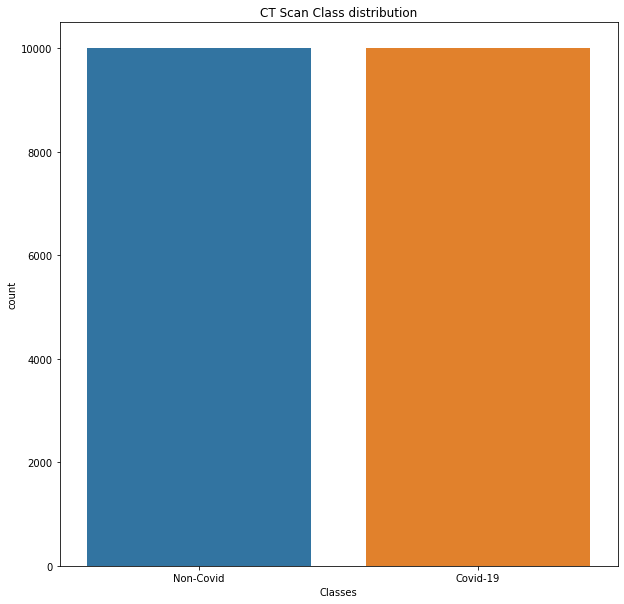

In [ ]:
#plotting a bar chart to visualize the class balance
plt.figure(figsize = (10,10))
plt.title("CT Scan Class distribution")
sns.countplot(x = "Classes",data = df_scan)
plt.show()

In [ ]:
#creating variables to store the path of the list of Xray and CT-Scan images
covid_files_xray = os.listdir(covidpath_xray)
noncovid_files_xray = os.listdir(noncovidpath_xray)
covid_files_ct_scan = os.listdir(covidpath_ct_scan)
noncovid_files_ct_scan = os.listdir(noncovidpath_ct_scan)

**Copying the Xray and CT-Scan files and creating the final dataset**

In [ ]:
#copying the covid Xray images to the final dataset covid-19 folder
copyfiles(covidpath_xray,covid_dir,covid_files_xray)

In [ ]:
#checking the number of images in final dataset covid directory
len(os.listdir(covid_dir))

10192

In [ ]:
#copying the covid CT Scan images to the final dataset covid-19 folder
copyfiles(covidpath_ct_scan,covid_dir,covid_files_ct_scan)

In [ ]:
#checking the number of images in final dataset covid directory
len(os.listdir(covid_dir))

20192

In [ ]:
#copying the non covid Xray images to the final dataset non-covid folder
copyfiles(noncovidpath_xray,non_covid_dir,noncovid_files_xray)

In [ ]:
#checking the number of images in final dataset non-covid directory
len(os.listdir(non_covid_dir))

10192

In [ ]:
#copying the non-covid CT Scan images to the final dataset non-covid folder
copyfiles(noncovidpath_ct_scan,non_covid_dir,noncovid_files_ct_scan)

In [ ]:
#checking the number of images in final dataset non-covid directory
len(os.listdir(non_covid_dir))

20192

In [ ]:
#creating final dataset dataframe consisting of both Xray & CT Scan images to visualize the class balance
Final_Data = pd.DataFrame(complete_path_list(covid_dir,non_covid_dir),columns = ['files','Classes'])
df_xray.head(10)

,files,Classes
0,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3792.png,Non-Covid
1,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/COVID_original_COVID-1888.png_4bbbb148-f305-4230-82da-3dc59ed57bfb.png,Covid-19
2,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-8615.png,Non-Covid
3,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/COVID/COVID-448.png,Covid-19
4,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-3824.png,Non-Covid
5,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-7049.png,Non-Covid
6,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-7111.png,Non-Covid
7,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-7616.png,Non-Covid
8,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-9235.png,Non-Covid
9,/content/COVID-19_Radiography_Database/COVID-19_Radiography_Dataset/Normal/Normal-565.png,Non-Covid


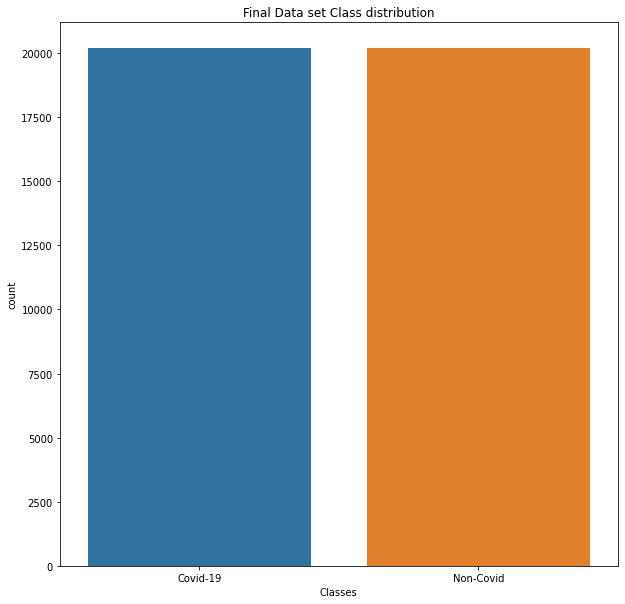

In [ ]:
#plotting a bar chart to visualize the class balance
plt.figure(figsize = (10,10))
plt.title("Final Data set Class distribution")
sns.countplot(x = "Classes",data = Final_Data)
plt.show()

In [ ]:
#creating variables to store the path of the list of Covid and non-covid images
covid_files = os.listdir(covid_dir)

Non_covid_files = os.listdir(non_covid_dir)

**Creating a function to covert a list to list of list**

In [ ]:
def path_extractor(lst):
    return [[ele] for ele in lst]

In [ ]:
#list of covid and non-covid images
lst_covid_img = [ covid_dir + "/" + item for i,item in enumerate(covid_files)]
lst_non_covid_img=[ non_covid_dir + "/" + item for i,item in enumerate(Non_covid_files)]

In [ ]:
#converting list of covid and non-covid images to list of list and storing them in a random order
covid_files_list=random.sample(path_extractor(lst_covid_img),len(path_extractor(lst_covid_img)))
non_covid_files_list=random.sample(path_extractor(lst_non_covid_img),len(path_extractor(lst_non_covid_img)))

**Creating a function to spilt the data**

In [ ]:
#creating a function to spilt the data
def split_data(startcount,endcount,dstpath,filelists):
  for i in range(startcount,endcount):
    for path in filelists[i]:
      src = path
      name=path.split('/')[-1]
      dst = os.path.join(dstpath, name)
      shutil.copyfile(src, dst)

**Splitting the data from final data to form the training dataset**

In [ ]:
split_data(0,14000,covid_train_dir,covid_files_list)

In [ ]:
len(os.listdir(covid_train_dir))

14000

In [ ]:
split_data(0,14000,non_covid_train_dir,non_covid_files_list)

In [ ]:
len(os.listdir(non_covid_train_dir))

14000

**Splitting the data from final data to form the test dataset**

In [ ]:
split_data(14001,20001,covid_test_dir,covid_files_list)

In [ ]:
len(os.listdir(covid_test_dir))

6000

In [ ]:
split_data(14001,20001,non_covid_test_dir,non_covid_files_list)

In [ ]:
len(os.listdir(non_covid_test_dir))

6000

**Splitting the data from final data to form the validation dataset**

In [ ]:
split_data(20002,20192,covid_val_dir,covid_files_list)

In [ ]:
len(os.listdir(covid_val_dir))

190

In [ ]:
split_data(20002,20192,non_covid_val_dir,non_covid_files_list)

In [ ]:
len(os.listdir(non_covid_val_dir))

190

**initializing variables to store the train,test and validation directory paths**

In [ ]:
train_path = "/content/train"
test_path="/content/test"
val_path="/content/val"

**Checking the number of images in each class in the train,test and validation directory**

In [ ]:
training_images_len = []
for category in os.listdir(train_path):
    num_images = len(os.listdir(os.path.join(train_path, category)))
    training_images_len.append(num_images)
    print(f'Total {category} images:', num_images)

print(f'Total training images: {np.sum(training_images_len)}')
print('-'*60)

Total COVID-19 images: 14000
Total NON-COVID images: 14000
Total training images: 28000
------------------------------------------------------------


In [ ]:
testing_images_len = []
for category in os.listdir(test_path):
    num_images = len(os.listdir(os.path.join(test_path, category)))
    testing_images_len.append(num_images)
    print(f'Total {category} images:', num_images)
print(f'All testing images: {np.sum(testing_images_len)}')
print('-'*60)

Total COVID-19 images: 6000
Total NON-COVID images: 6000
All testing images: 12000
------------------------------------------------------------


In [ ]:
val_images_len = []
for category in os.listdir(val_path):
    num_images = len(os.listdir(os.path.join(val_path, category)))
    val_images_len.append(num_images)
    print(f'Total {category} images:', num_images)
print(f'All val images: {np.sum(val_images_len)}')
print('-'*60)

Total COVID-19 images: 190
Total NON-COVID images: 190
All val images: 380
------------------------------------------------------------


**plotting random images to have a look at the dataset**

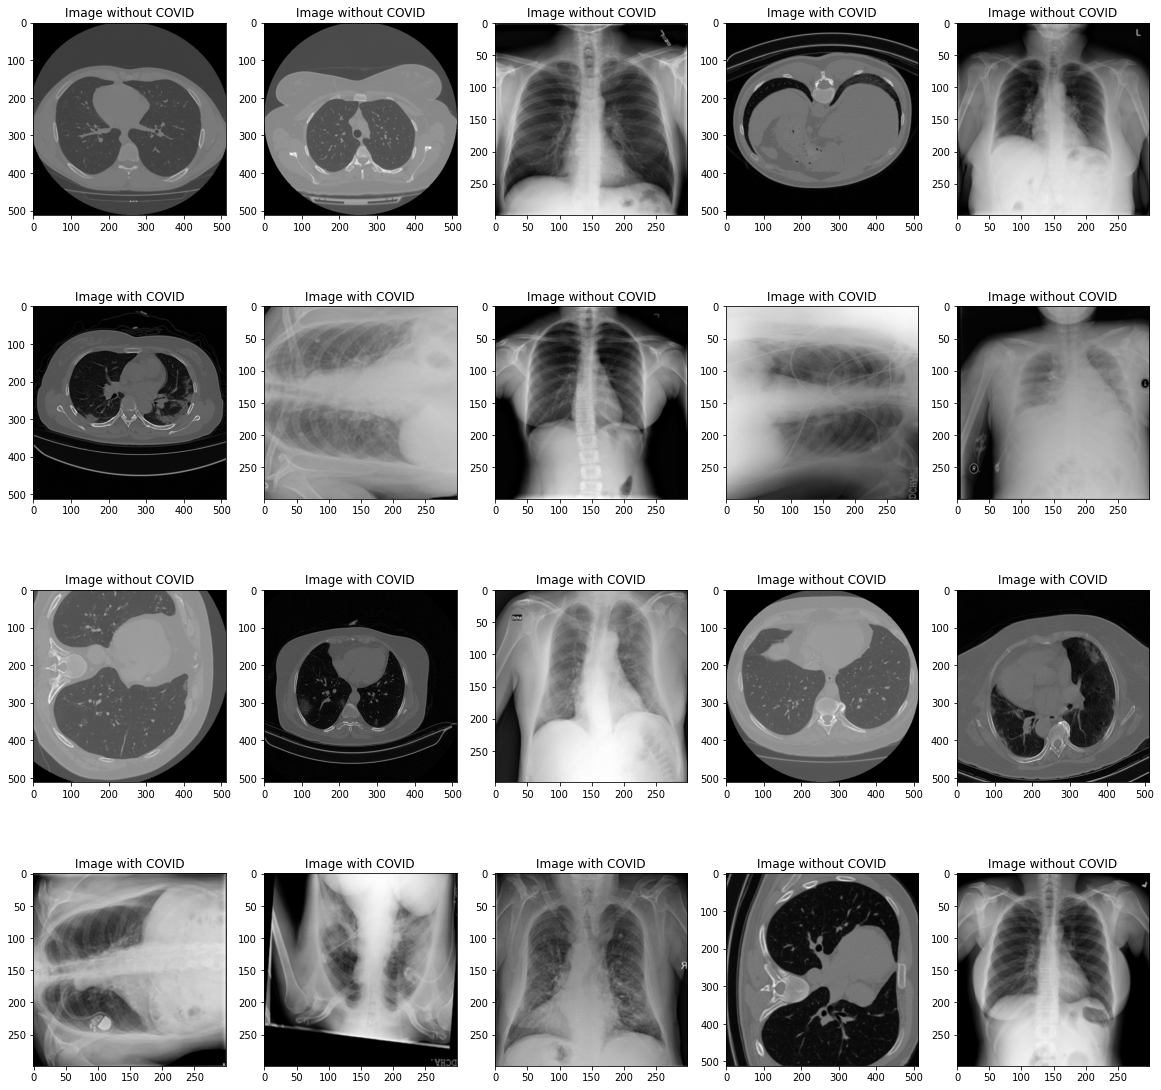

In [ ]:
lst_images_random = random.sample(lst_covid_img,10) + random.sample(lst_non_covid_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):

    plt.subplot(4,5,i+1)


    if "NON-COVID" in lst_images_random[i]:
        #print(lst_images_random[i])
        image = cv2.imread(lst_images_random[i])
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        plt.imshow(image,cmap = 'gray')
        plt.title('Image without COVID')

    else:
        image = cv2.imread(lst_images_random[i])
        image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        plt.imshow(image,cmap = 'gray')
        plt.title("Image with COVID")

**Loading a random image to study its features**

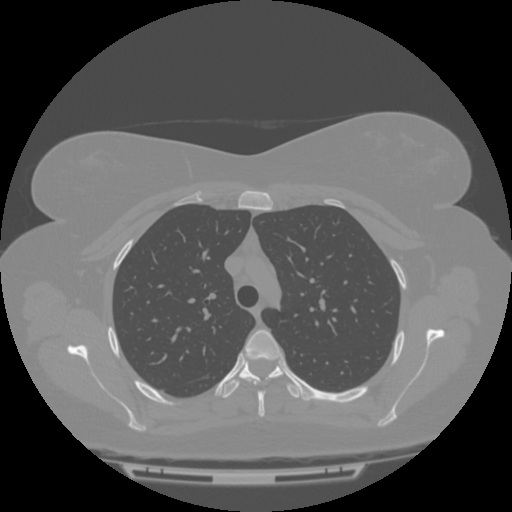

In [ ]:
#opening a random image
PIL.Image.open(str(lst_images_random[1]))

In [ ]:
#checking the image width and height
image = PIL.Image.open(str(lst_images_random[1]))

width, height = image.size

In [ ]:
print(width, height)

512 512


In [ ]:
#checking the image format
image.format

'PNG'

In [ ]:
#checking the image mode
image.mode

'L'

**storing the size of the image to resize the image**

In [ ]:
IMG_SIZE=224

**creating the function to split the features and the labels**

In [ ]:
def createDataSplitSet(datapath):
    X=[]
    y=[]


    for directory_path in glob.glob(datapath):

      label = directory_path.split("/")[-1]         #splitting the path to get the label
      print(label)
      for path in glob.glob(os.path.join(directory_path,"*")):

        image=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))#reading the image and resizing it
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)                              #converting grey scale image to RGB format
        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)#normalizing the image

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y) #converting the list of features and labels to numpy array

In [ ]:
#creating train and test paths for the glob function
train_path='/content/train/*'
test_path='/content/test/*'

In [ ]:
#splitting the training dataset features and labels
train_X, train_y = createDataSplitSet(train_path)

COVID-19
NON-COVID


In [ ]:
#splitting the test dataset features and labels
test_X, test_y = createDataSplitSet(test_path)

COVID-19
NON-COVID


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
label.fit(test_y)
test_labels_encoded = label.transform(test_y)
label.fit(train_y)
train_labels_encoded = label.transform(train_y)

In [ ]:
from tensorflow.keras.layers import Dense, Input,Flatten
from tensorflow.keras import Model,layers
from tensorflow.keras.applications import VGG16

In [ ]:
#Load model without classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False

VGG_model.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(train_X)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features #This is our X input to RF

**Feature extraction using PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 85)
#pca=PCA()
X_for_RF_sf = pca.fit_transform(X_for_RF)
#X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.30811277, 0.06047005, 0.03471741, 0.02681771, 0.02176963,
       0.01756783, 0.01382964, 0.01215949, 0.01191769, 0.01001267,
       0.00906418, 0.00838915, 0.00744146, 0.00739336, 0.00675034,
       0.00611766, 0.00601314, 0.00535353, 0.00513145, 0.00502896,
       0.0048144 , 0.00466717, 0.00460416, 0.00429195, 0.00422409,
       0.00404492, 0.00381939, 0.00367537, 0.00362098, 0.00344224,
       0.00321091, 0.00317076, 0.00302173, 0.00297786, 0.00281938,
       0.00273074, 0.00270958, 0.00263074, 0.00248684, 0.00247548,
       0.00240387, 0.00229608, 0.00226098, 0.00216866, 0.00206966,
       0.00204423, 0.0019893 , 0.00194547, 0.00191846, 0.00190115,
       0.00182706, 0.00181032, 0.00175281, 0.00173926, 0.0017134 ,
       0.00169746, 0.00163349, 0.00160582, 0.00156735, 0.00154185,
       0.00149696, 0.00147927, 0.0014673 , 0.00143122, 0.00139647,
       0.00139191, 0.00135926, 0.00134174, 0.00132944, 0.0013118 ,
       0.00130513, 0.00129056, 0.00127279, 0.00126557, 0.00123

In [ ]:
#RANDOM FOREST classifier
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators= 550,criterion='entropy')#this configuration gives best accuracy for this dataset

In [ ]:
# Train the model on training data
RF_model.fit(X_for_RF_sf, train_labels_encoded) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(test_X)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
X_test_features_sf = pca.transform(X_test_features)

In [ ]:
#Now predict using the trained RF model.
prediction_RF = RF_model.predict(X_test_features_sf)
#Inverse le transform to get original label back.
prediction_RF_transformed = label.inverse_transform(prediction_RF)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_y, prediction_RF_transformed))

Accuracy =  0.9348333333333333


In [ ]:
print('Precision score=',metrics.precision_score(test_labels_encoded, prediction_RF,average=None))
print('Recall score=',metrics.recall_score(test_labels_encoded, prediction_RF,average=None))

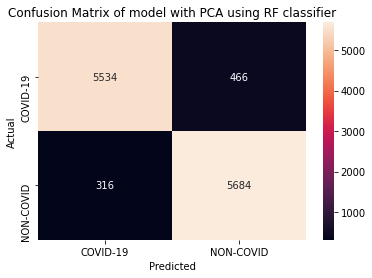

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, prediction_RF_transformed)

ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Confusion Matrix of model with PCA using RF classifier');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(["COVID-19","NON-COVID"])
ax.yaxis.set_ticklabels(["COVID-19","NON-COVID"])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

**SVM Model for comparision purpose**

In [ ]:
from sklearn.svm import SVC
claf = SVC(kernel='linear')

In [ ]:
# Train the model on training data
claf.fit(X_for_RF_sf, train_labels_encoded) #For sklearn no one hot encoding

#Send test data through same feature extractor process
#X_test_feature = VGG_model.predict(test_X)
#X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#X_test_features_claf = pca.transform(X_test_features)

In [ ]:
#Now predict using the trained RF model.
prediction_claf = claf.predict(X_test_features_sf)
#Inverse le transform to get original label back.
prediction_claf_transformed = label.inverse_transform(prediction_claf)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_y, prediction_claf_transformed))

Accuracy =  0.8904166666666666


In [ ]:
print('Precision score=',metrics.precision_score(test_labels_encoded, prediction_claf,average=None))
print('Recall score=',metrics.recall_score(test_labels_encoded, prediction_claf,average=None))

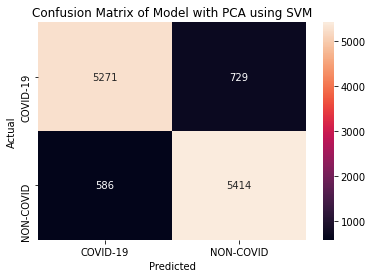

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, prediction_claf_transformed)

ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Confusion Matrix of Model with PCA using SVM');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(["COVID-19","NON-COVID"])
ax.yaxis.set_ticklabels(["COVID-19","NON-COVID"])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

**VGG16+RF model without PCA**

In [ ]:
RF_model_without_PCA = RandomForestClassifier(n_estimators= 550,criterion='entropy')
# Train the model on training data
RF_model_without_PCA.fit(X_for_RF, train_labels_encoded) #For sklearn no one hot encoding

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(test_X)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
#Now predict using the trained RF model.
prediction_RF = RF_model_without_PCA.predict(X_test_features)
#Inverse le transform to get original label back.
prediction_RF_transformed = label.inverse_transform(prediction_RF)

In [ ]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_y, prediction_RF_transformed))

Accuracy =  0.9273333333333333


In [ ]:
print('Precision score=',metrics.precision_score(test_labels_encoded, prediction_RF,average=None))
print('Recall score=',metrics.recall_score(test_labels_encoded, prediction_RF,average=None))

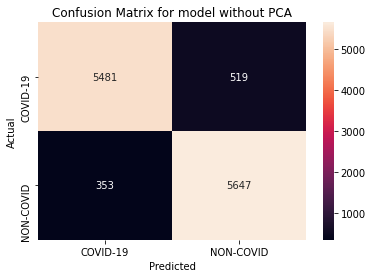

In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, prediction_RF_transformed)

ax = sns.heatmap(cm, annot=True, fmt='g');
## Modify the Axes Object directly to set various attributes such as the
## Title, X/Y Labels.
ax.set_title('Confusion Matrix for model without PCA');
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(["COVID-19","NON-COVID"])
ax.yaxis.set_ticklabels(["COVID-19","NON-COVID"])
## Finally call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

**VGG-16 alone used for classification**

In [ ]:
IMG_SIZE = 224

In [ ]:
img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

In [ ]:
model = VGG16(include_top=True,weights="imagenet",input_tensor=img_input,input_shape=None,pooling=None,classes=1000,classifier_activation="softmax")
model.summary()

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
last_layer = model.get_layer('fc2').output
out = Dense(1, activation='sigmoid', name='output')(last_layer)  ## 2 classes
model = Model(img_input, out)

for layer in model.layers[:-1]:
	layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [ ]:
history = model.fit(train_X, train_labels_encoded,
                               batch_size=20,
                               epochs=20,
                               validation_data=(test_X, test_labels_encoded),
                               callbacks=my_callbacks)

Epoch 1/20
1400/1400 [==============================] - 1389s 992ms/step - loss: 0.4358 - acc: 0.8070 - val_loss: 0.3700 - val_acc: 0.8428
Epoch 2/20
1400/1400 [==============================] - 1335s 953ms/step - loss: 0.3620 - acc: 0.8471 - val_loss: 0.3371 - val_acc: 0.8597
Epoch 3/20
1400/1400 [==============================] - 1349s 964ms/step - loss: 0.3377 - acc: 0.8579 - val_loss: 0.3669 - val_acc: 0.8412
Epoch 4/20
1400/1400 [==============================] - 1354s 968ms/step - loss: 0.3199 - acc: 0.8673 - val_loss: 0.3084 - val_acc: 0.8712
Epoch 5/20
1400/1400 [==============================] - 1300s 928ms/step - loss: 0.3084 - acc: 0.8744 - val_loss: 0.3136 - val_acc: 0.8733
Epoch 6/20
1400/1400 [==============================] - 1290s 922ms/step - loss: 0.2987 - acc: 0.8797 - val_loss: 0.3107 - val_acc: 0.8676
Epoch 7/20
1400/1400 [==============================] - 1293s 923ms/step - loss: 0.2936 - acc: 0.8799 - val_loss: 0.3158 - val_acc: 0.8722
Epoch 8/20
1400/1400 [=====

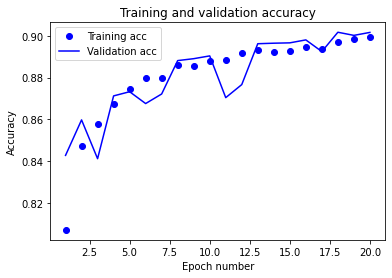

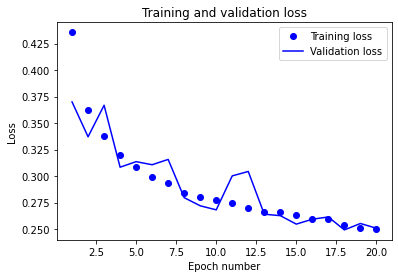

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**Predection of random images**

The prediction for this image is:  ['NON-COVID']
The actual label for this image is:  NON-COVID


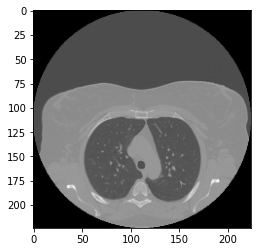

In [ ]:
#Check results on a few select images using proposed model
n=np.random.randint(0, test_X.shape[0])
img = test_X[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
input_img_features = pca.transform(input_img_features)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = label.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_y[n])

In [ ]:
#upload the images to google colab and copy and paste the path below to validate the model
path='/content/val/COVID-19/14_Jun_coronacases_case10_107.png'

image=cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

X=np.array(image)

plt.imshow(image)

input_img = np.expand_dims(X, axis=0)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
input_img_features = pca.transform(input_img_features)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = label.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)